## Import Data 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Processing Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Menghapus Kolom**

Dari info diatas, terlihat bahwa `banyak kolom yang tidak kita butuhkan`, oleh karena itu kita perlu menghapusnya. 
Disini kita akan menghapus kolom:
- Unnamed: 0 = karena kolom tersebut merupakan index jadi kita tidak memerlukannya
- EASE-MENT: = karena kolom tersebut merupakan kolom kosong
- APARTMENT NUMBER dan ADDRESS = karena sudah terdapat kolom zipcode yang merepresentasikan wilayah rumah

In [3]:
df.drop(['Unnamed: 0','EASE-MENT','APARTMENT NUMBER','ADDRESS'],axis=1, inplace=True)

Disini kita akan membersihkan data dari data data yang tidak sesuai 

**Merubah Tipe Data**

Seperti yang terlihat pada info dataset, `terdapat kolom yang bertipe tidak sesuai dengan seharusnya,` 
Oleh karena itu kita harus merubahnya.
Disini kita akan merubah tipe kolom:
- "RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE" : Dari tipe Object menjadi Numeric
- "BOROUGH","NEIGHBORHOOD","BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ZIP CODE", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE","BLOCK","LOT" : Dari Object menjadi Category
- SALE DATE : Dari tipe Object menjadi Date


In [4]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" ,
           "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical = ["BOROUGH","NEIGHBORHOOD","BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT",
               "BUILDING CLASS AT PRESENT", "ZIP CODE", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE",
               "BLOCK","LOT"]
for col in categorical: 
    df[col] = df[col].astype('category')
    
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

**Missing Value pada Dataset**

`Missing Value merupakan data yang hilang pada dataset.` Disini kita akan mengatasinya dengan Mengisi beberapa data yang hilang dan menghapus data yang hilang lainnya.

In [5]:
import numpy as np
df.replace(' ',np.nan, inplace=True)

In [6]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

pada output diatas menunjukkan bahwa terdapat banyak missing value pada kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`. Untuk itu daripada kita menghapus data sebanyak itu, kita bisa membuat imputation antar satu sama lain pada baris dengan nilai disatu kolom dan bukan di yang lain

In [7]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape[0])
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape[0])

6
1366


Diatas menunjukkan terdapat 1372 kolom yang bisa kita isi dengan nilai perkiraan

Pada kode dibawah ini, kita akan membuat dataset baru yang berisi kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET` untuk membuat model regresi yang bisa mengisi missing value dengan nilai yang akurat

In [8]:
imputation = df[['LAND SQUARE FEET','GROSS SQUARE FEET']]

In [9]:
imputation.dropna(inplace = True)

Model Regresi untuk memprediksi missing value pada kolom `Gross Square Feet`

In [10]:
from sklearn.linear_model import LinearRegression
X = imputation['LAND SQUARE FEET']
y = imputation['GROSS SQUARE FEET']

lm = LinearRegression()
model = lm.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

print("Sabit: ", model.intercept_)
print("Katsayı: ", model.coef_)
print("Regresyon Modeli: Y={}+{}X".format(model.intercept_,model.coef_))
print("Rsquare: ", model.score(X.values.reshape(-1,1),y.values.reshape(-1,1)))

Sabit:  [1701.2484797]
Katsayı:  [[0.64815423]]
Regresyon Modeli: Y=[1701.2484797]+[[0.64815423]]X
Rsquare:  0.4133841980340115


Model Regresi untuk memprediksi missing value pada kolom `Land Square Feet`

In [11]:
X = imputation['GROSS SQUARE FEET']
y = imputation['LAND SQUARE FEET']

lm = LinearRegression()
model = lm.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

print("Sabit: ", model.intercept_)
print("Katsayı: ", model.coef_)
print("Regresyon Modeli: Y={}+{}X".format(model.intercept_,model.coef_))
print("Rsquare: ", model.score(X.values.reshape(-1,1),y.values.reshape(-1,1)))

Sabit:  [1033.76397579]
Katsayı:  [[0.63778678]]
Regresyon Modeli: Y=[1033.76397579]+[[0.63778678]]X
Rsquare:  0.4133841980340116


Function untuk memprediksi missing value pada kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET` berdasarkan estimator dari model yang telah dibuat

In [12]:
def imputer_gross(x):
    return x * 0.64779857 + 1822.76092513

def imputer_land(x):
    return x * 0.6375468 + 1107.3023519

Mengisi missing value berdasarkan function yang telah dibuat

In [13]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()),
                                                     imputer_land(df['GROSS SQUARE FEET']))
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()),
                                                       imputer_gross(df['LAND SQUARE FEET']))

Setelah mengisi beberapa missing value pada kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`, kita bisa beralih mengatasi ke missing value lainnya dengan cara menghapusnya.

In [14]:
df = df.dropna()

**Duplicate Data** 

`Duplicate Data merupakan data yang berisi duplikat dari data lain.`

Dalam hal ini kita bisa mengatasinya dengan cara menghapus baris data yang duplikat dan menyimpan baris duplikat yang asli

In [15]:
print(df.duplicated().sum())

402


In [16]:
df.drop_duplicates(inplace=True)

**Membersihkan Data yang tidak sesuai**

Disini kita akan menghapus data data yang tidak sesuai. 
- Data Kolom `TOTAL UNIT` yang tidak sesuai dengan hasil pertambahan kolom `COMMERCIAL UNITS` dan `RESIDENTIAL UNITS`
- Data kolom `YEAR BUILT`, `LAND SQUARE FEET`, `GROSS SQUARE FEET` yang berisi 0 

In [17]:
df_new = df[df["SALE PRICE"] > 0] 
df_new = df_new[df_new['TOTAL UNITS'] == df_new['COMMERCIAL UNITS'] + df_new['RESIDENTIAL UNITS']]
df_new = df_new[df_new['YEAR BUILT'] != 0]
df_new = df_new[df_new["LAND SQUARE FEET"] != 0]
df_new = df_new[df_new["GROSS SQUARE FEET"] != 0]


**Outliers**

disini kita akan mengidentifikasi data outliers yang ada pada kolom `SALE PRICE` menggunakan describe.

In [18]:
df_new.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,29333.00000,29333.00000,29333.00000,29333.00000,29333.00000,29333.00000,29333.00000
mean,2.98336,0.30907,3.29244,4206.10817,4402.23091,1940.86602,1644075.66093
std,18.89364,13.78209,23.52943,38349.00104,33432.07242,31.10560,16997687.42236
min,0.00000,0.00000,0.00000,168.00000,120.00000,1111.00000,1.00000
25%,1.00000,0.00000,1.00000,2000.00000,1364.00000,1920.00000,420000.00000
50%,2.00000,0.00000,2.00000,2500.00000,1880.00000,1930.00000,620000.00000
75%,2.00000,0.00000,2.00000,4000.00000,2688.00000,1960.00000,950000.00000
max,1844.00000,2261.00000,2261.00000,4228300.00000,3750565.00000,2017.00000,2210000000.00000


disini terlihat bahwa nilai max pada kolom `SALE PRICE` jauh dengan mean yang ada.

sekarang kita akan mengidentifikasi nilai `SALE PRICE` yang kurang dari 10.000 atau nilai yang lebih dari 10.000.000

In [19]:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.2409207267581011

In [20]:
Q1 = df_new['SALE PRICE'].quantile(0.25)
Q3 = df_new['SALE PRICE'].quantile(0.75)
print(Q1, Q3)

420000.0 950000.0


Terlihat bahwa terdapat 25% data yang kurang dari 10.000 atau nilai yang lebih dari 10.000.000. Maka kita harus menghapus data ini karena termasuk data outliers yang mana data tersebut diluar batas Q1 dan Q3 .

In [21]:
# Pada kolom sale price
df_new = df_new[(df_new['SALE PRICE']>10000) & (df_new['SALE PRICE']<10000000)]

*Dengan ini maka Data telah siap untuk digunakan*

## Measure of Central Tendency : Mean

Menghitung Mean menggunakan Pandas

In [22]:
round(df_new.mean(), 3)

RESIDENTIAL UNITS         2.341
COMMERCIAL UNITS          0.227
TOTAL UNITS               2.568
LAND SQUARE FEET       3861.434
GROSS SQUARE FEET      3121.873
YEAR BUILT             1941.002
SALE PRICE           917141.687
dtype: float64

Menghitung Mean menggunakan Numpy

In [23]:
import numpy as np
round(np.mean(df_new), 3)

RESIDENTIAL UNITS         2.341
COMMERCIAL UNITS          0.227
TOTAL UNITS               2.568
LAND SQUARE FEET       3861.434
GROSS SQUARE FEET      3121.873
YEAR BUILT             1941.002
SALE PRICE           917141.687
dtype: float64

Menghitung Mean menggunakan Scipy

In [24]:
import scipy.stats
round(scipy.mean(df_new), 3)

RESIDENTIAL UNITS         2.341
COMMERCIAL UNITS          0.227
TOTAL UNITS               2.568
LAND SQUARE FEET       3861.434
GROSS SQUARE FEET      3121.873
YEAR BUILT             1941.002
SALE PRICE           917141.687
dtype: float64

## Measure of Central Tendency : Median

Menghitung Median menggunakan Pandas

In [25]:
round(df_new.median(), 3)

RESIDENTIAL UNITS         2.0
COMMERCIAL UNITS          0.0
TOTAL UNITS               2.0
LAND SQUARE FEET       2500.0
GROSS SQUARE FEET      1848.0
YEAR BUILT             1930.0
SALE PRICE           625000.0
dtype: float64

Menghitung Median menggunakan Numpy

In [26]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, round(np.median(df_new[col]),3))

RESIDENTIAL UNITS 2.0
COMMERCIAL UNITS 0.0
TOTAL UNITS 2.0
LAND SQUARE FEET 2500.0
GROSS SQUARE FEET 1848.0
YEAR BUILT 1930.0
SALE PRICE 625000.0


Menghitung Median Menggunakan Scipy

In [27]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, round(scipy.median(df_new[col]),3))

RESIDENTIAL UNITS 2.0
COMMERCIAL UNITS 0.0
TOTAL UNITS 2.0
LAND SQUARE FEET 2500.0
GROSS SQUARE FEET 1848.0
YEAR BUILT 1930.0
SALE PRICE 625000.0


## Measure of Central Tendency : Modus

Menghitung Modus Menggunakan Pandas

In [28]:
round(df_new.mode(),3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,4452,1,A1,10314,1,0,1,2000.0,1800.0,1920,1,A1,700000.0,2017-04-28


In [29]:
categorical = df_new.select_dtypes(include=['category'])

In [30]:
categorical.describe().transpose()

,count,unique,top,freq
BOROUGH,27862,5,4,10707
NEIGHBORHOOD,27862,245,FLUSHING-NORTH,771
BUILDING CLASS CATEGORY,27862,28,01 ONE FAMILY DWELLINGS,12595
TAX CLASS AT PRESENT,27862,7,1,24680
BLOCK,27862,9736,4452,57
LOT,27862,661,1,623
BUILDING CLASS AT PRESENT,27862,115,A1,4705
ZIP CODE,27862,173,10314,859
TAX CLASS AT TIME OF SALE,27862,3,1,24697
BUILDING CLASS AT TIME OF SALE,27862,115,A1,4703


Menghitung Modus menggunakan Numpy

In [31]:
columns=["BOROUGH","NEIGHBORHOOD","BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT",
               "BUILDING CLASS AT PRESENT", "ZIP CODE", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE",
               "BLOCK","LOT",'RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    vals,counts = np.unique(df_new[col], return_counts=True)
    index = np.argmax(counts)
    print(col, vals[index])


BOROUGH 4
NEIGHBORHOOD FLUSHING-NORTH
BUILDING CLASS CATEGORY 01 ONE FAMILY DWELLINGS                    
TAX CLASS AT PRESENT 1
BUILDING CLASS AT PRESENT A1
ZIP CODE 10314
BUILDING CLASS AT TIME OF SALE A1
TAX CLASS AT TIME OF SALE 1
BLOCK 4452
LOT 1
RESIDENTIAL UNITS 1
COMMERCIAL UNITS 0
TOTAL UNITS 1
LAND SQUARE FEET 2000.0
GROSS SQUARE FEET 1800.0
YEAR BUILT 1920
SALE PRICE 700000.0


Menghitung Modus menggunakan Scipy

In [32]:
from scipy import stats
columns=["BOROUGH","NEIGHBORHOOD","BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT",
               "BUILDING CLASS AT PRESENT", "ZIP CODE", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE",
               "BLOCK","LOT",'RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE', 'SALE DATE']
x = stats.mode(df_new)
mode = x.mode
count=x.count
dx = pd.DataFrame(mode, columns = columns)
dx

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,BUILDING CLASS AT TIME OF SALE,TAX CLASS AT TIME OF SALE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,4452,1,A1,10314,1,0,1,2000.0,1800.0,1920,1,A1,700000.0,2017-04-28


## Measure of Spread : Range

Menghitung Range menggunakan Pandas

In [33]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, (df_new[col].max() - df_new[col].min()))

RESIDENTIAL UNITS 1844
COMMERCIAL UNITS 2261
TOTAL UNITS 2261
LAND SQUARE FEET 4228132.0
GROSS SQUARE FEET 3750445.0
YEAR BUILT 906
SALE PRICE 9989998.0


Menghitung Range menggunakan Numpy

In [34]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, np.ptp(df_new[col]))


RESIDENTIAL UNITS 1844
COMMERCIAL UNITS 2261
TOTAL UNITS 2261
LAND SQUARE FEET 4228132.0
GROSS SQUARE FEET 3750445.0
YEAR BUILT 906
SALE PRICE 9989998.0


## Measure of Spread : Variance

Menghitung Variance menggunakan Pandas

In [35]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, round(df_new[col].var(), 3))

RESIDENTIAL UNITS 203.879
COMMERCIAL UNITS 186.16
TOTAL UNITS 393.185
LAND SQUARE FEET 1343839494.447
GROSS SQUARE FEET 662628176.001
YEAR BUILT 965.977
SALE PRICE 1187888252708.402


Menghitung Variance menggunakan Numpy

In [36]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, round(np.var(df_new[col]), 3))

RESIDENTIAL UNITS 203.872
COMMERCIAL UNITS 186.154
TOTAL UNITS 393.171
LAND SQUARE FEET 1343791262.464
GROSS SQUARE FEET 662604393.495
YEAR BUILT 965.942
SALE PRICE 1187845617999.741


## Measure of Spread : Standard Deviation

Menghitung Standard Deviasi menggunakan Pandas

In [37]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, round(df_new[col].std(), 3))

RESIDENTIAL UNITS 14.279
COMMERCIAL UNITS 13.644
TOTAL UNITS 19.829
LAND SQUARE FEET 36658.416
GROSS SQUARE FEET 25741.565
YEAR BUILT 31.08
SALE PRICE 1089902.864


Menghitung Standard Deviasi menggunakan Numpy

In [38]:
columns=['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE']
for col in columns:
    print(col, round(np.std(df_new[col]), 3))

RESIDENTIAL UNITS 14.278
COMMERCIAL UNITS 13.644
TOTAL UNITS 19.829
LAND SQUARE FEET 36657.759
GROSS SQUARE FEET 25741.103
YEAR BUILT 31.08
SALE PRICE 1089883.305


## Probability Distribution

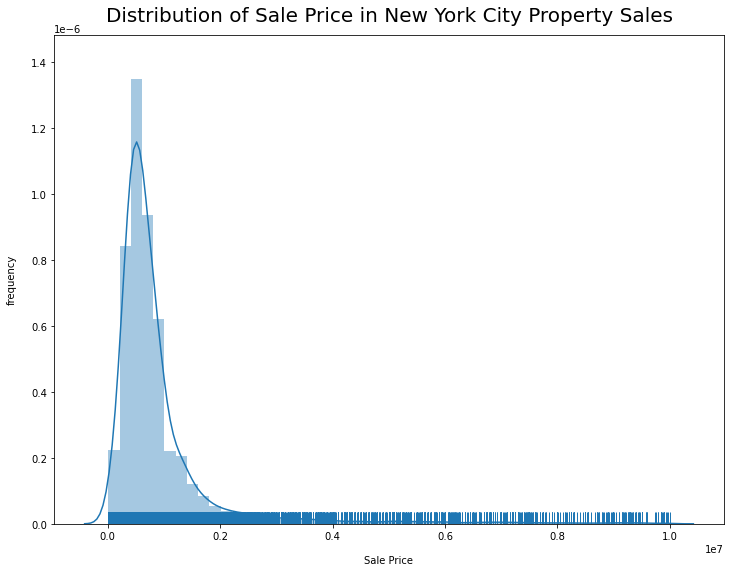

In [39]:
# View Distribution of Sample Means (Biasanya disebut dengan Sampling Distribution)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,9))
sns.distplot(df_new['SALE PRICE'], kde=True, bins=50, rug=True)
plt.title("Distribution of Sale Price in New York City Property Sales",
          y=1.015, fontsize=20)
plt.xlabel("Sale Price", labelpad=14)
plt.ylabel("frequency", labelpad=14);

In [40]:
round(df_new.describe(),3)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,27862.000,27862.000,27862.000,27862.000,27862.000,27862.000,27862.000
mean,2.341,0.227,2.568,3861.434,3121.873,1941.002,917141.687
std,14.279,13.644,19.829,36658.416,25741.565,31.080,1089902.864
min,0.000,0.000,0.000,168.000,120.000,1111.000,10001.000
25%,1.000,0.000,1.000,2000.000,1355.000,1920.000,435000.000
50%,2.000,0.000,2.000,2500.000,1848.000,1930.000,625000.000
75%,2.000,0.000,2.000,3917.000,2600.000,1960.000,949000.000
max,1844.000,2261.000,2261.000,4228300.000,3750565.000,2017.000,9999999.000


Pada histogram diatas menunjukkan bahwa data distribusi harga penjualan properti pada kota New York  ` berdistribusi normal` dengan
- mean : 917141.687
- median : 625000.0
- standart deviasi : 1089902.864

## Convidence Interval

In [41]:
import numpy as np
import scipy.stats as st
sale= df_new['SALE PRICE']
st.norm.interval(alpha=0.95, loc=np.mean(sale), scale=st.sem(sale))

(904344.0510066777, 929939.3222615729)

## Hypothesis Testing

**`Studi Kasus`**
> **“Persebaran harga properti dikota boston dengan harga kurang atau sama dengan 850000 USD mencapai 35%. Apakah pada kota New York City  harga properti dengan harga tersebut lebih dari 35% ”**?

***Menentukan Null Hypothesis dan Alternative Hypothesis***

**`null hypothesis`** dari studi kasus ini adalah persebaran harga properti di New York City dengan harga `kurang dari atau sama dengan 850000 mencapai 35%` sedangkan **`hypothesis alternative`** adalah persebaran harga properti di New York City mencapai harga `kurang dari atau sama dengan 850000 mencapai lebih dari 35% `

**`Null Hypothesis`** : 
- Ho: p0 <= 0.35

**`Alternative Hypothesis`** : 
- Ha: p > 0.35


***Menghitung persebaran atau proporsi harga properti kurang dari atau sama dengan 850000 pada New York City***

In [42]:
p_sale = len(df_new[df_new['SALE PRICE']>=850000])/len(df)
p_sale

0.178588524214864

Persebaran harga properti dikota New York City dengan harga kurang dari atau sama dengan 850000 adalah 0.18 atau 18%. Presentase tersebut sama seperti pernyataan pada null hypothesis.
untuk memastikan pernyataan secara signifikan sama dengan null hyopotesis tersebut kita perlu melakukan hypothesis test

***Menghitung Tes Statistic/ Z-Score***

Dalam menghitung tes ini diketahui po adalah 0.35 dan n adalah ukuran sampel populasi

In [43]:
se = np.sqrt(0.35 * (1-0.42) / len(df))
se

0.002055444914144912

In [44]:
#Best estimate
be = p_sale

#hypothesized estimate
he = 0.35
test_stat = (be - he)/se
test_stat

-83.39385531839712

Hasil test statistics adalah `-82.344`

***menghitung p-value***

In [45]:
import scipy.stats.distributions as dist
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print(pvalue)

0.0


`p-value adalah 0.0`

***Kesimpulan dari p-value***

Dengan level alpha 0.05 ataau 5%. Maka ada 95% kemungkinan atau lebih besar bahwa hasilnya tidak acak. 

Dari hasil p-value yang didapat, pvalue lebih rendah dari significance level yaitu 0.05. Maka dengan ini Ho atau null Hypothesis diterima. Dapat disimpulkan bahwa harga property di New York City dengan harga 850000 USD tidak lebih dari 35% serta tidak terdapat perbedaan yang signifikan dalam hal tersebut. 